<a href="https://colab.research.google.com/github/Divyanshu-ISM/Oil-and-Gas-data-analysis/blob/master/LogisticRegression_AdvertisingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aim - 
Based on the given Features, our aim is to check if the user will click on a particular Ad or not. 

Y(Clicking on Ad?) - 1(Yes) & 0(No)

#1. Import Libraries and Get the Data-set.

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
from scipy import stats

In [6]:
df = pd.read_csv('/content/advertising.csv')

df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#2. Get a Feel of the Data
>info - to check for dtypes & null %. 

>describe - summary statistics. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [8]:
#Conclusions - 1000 examples. 5 numeric, 5 object. No null values.

In [9]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [10]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

No handles with labels found to put in legend.


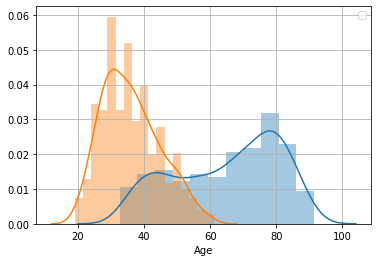

In [14]:
sns.distplot(df['Daily Time Spent on Site'])
sns.distplot(df['Age'])
plt.grid()
plt.legend()

In [33]:
stats.mode(d)[0][0]

13996.5

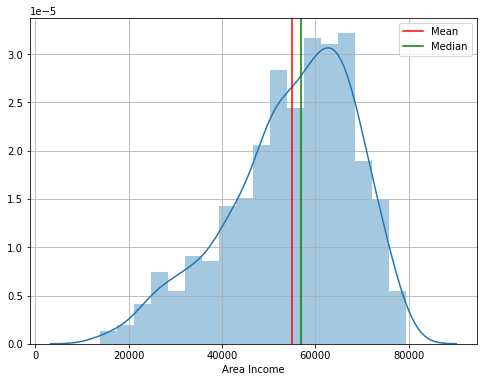

In [35]:
plt.figure(figsize=(8,6))
sns.distplot(df['Area Income'])
d = df['Area Income']
plt.axvline(x=d.mean(),color='red',label='Mean')
plt.axvline(x=d.median(),color='green',label='Median')
plt.legend()
plt.grid()

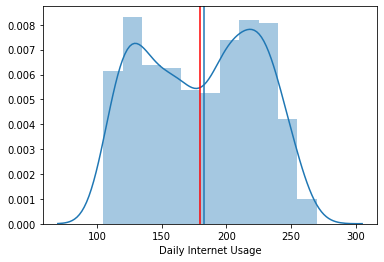

In [21]:
sns.distplot(df['Daily Internet Usage'])

plt.axvline(x = df['Daily Internet Usage'].mean(),color='red')
plt.axvline(x = df['Daily Internet Usage'].median())


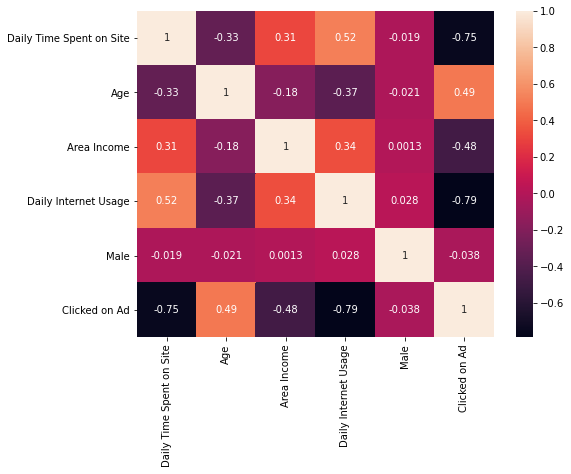

In [39]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)

What you see in the annotation of a heatmap is pearson-r correlation coeff.

In [40]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

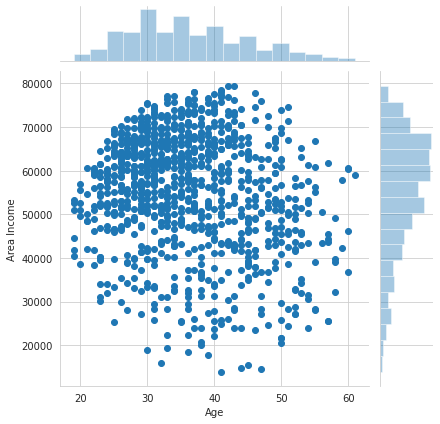

In [47]:
sns.set_style('whitegrid')
# fig,ax = plt.subplots(nrows=1,ncols=3)

sns.jointplot(x='Age',y='Area Income',data=df)

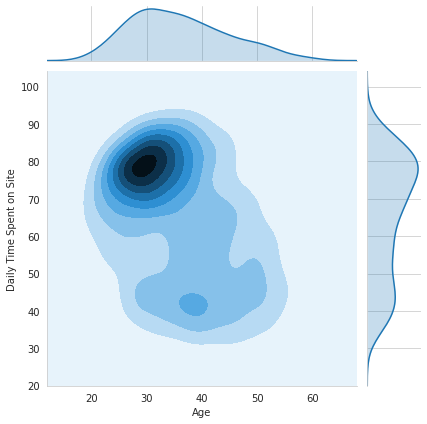

In [45]:
sns.set_style('whitegrid')
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df,kind='kde')

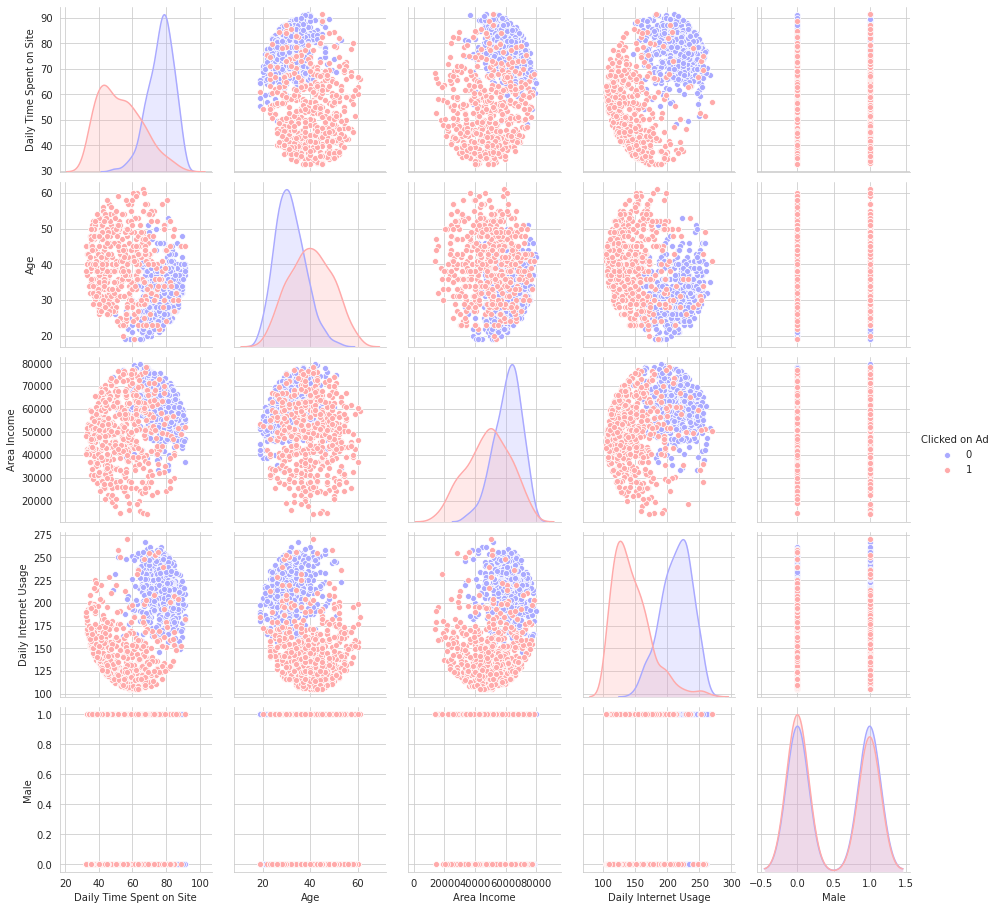

In [49]:
sns.pairplot(df,hue='Clicked on Ad',palette='bwr')

#Machine Learning Time

In [53]:
# df.columns
X = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]

y = df['Clicked on Ad']

In [50]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.linear_model import LogisticRegression

In [56]:
logreg = LogisticRegression()

In [57]:
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_p = logreg.predict(X_test)

In [60]:
comparison_df = pd.DataFrame({'Actual y': y_test , 'Predicted y': y_p})

In [64]:
correct = comparison_df[comparison_df['Actual y'] == comparison_df['Predicted y']]

Accuracy = len(correct)/len(comparison_df)

In [66]:
Accuracy

0.906060606060606

In [71]:
print(f'Correct Predictions : {len(correct)}')
print(f'In-Correct Predictions : {len(comparison_df) - len(correct)}')

Correct Predictions : 299
In-Correct Predictions : 31


In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test,y_p))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       162
           1       0.96      0.85      0.90       168

    accuracy                           0.91       330
   macro avg       0.91      0.91      0.91       330
weighted avg       0.91      0.91      0.91       330

